In [1]:
# import all the modules
import h5py
import numpy as np
import pandas as pd

In [2]:
# GEDI L4a file
l4a = 'GEDI04_A_2020324080102_O10975_03_T07840_02_002_02_V002.h5'
# GEDI L2a file
l2a = 'GEDI02_A_2020324080102_O10975_03_T07840_02_003_02_V002.h5'
# read the L4A file
with h5py.File(l4a, 'r') as hf:
    # reading BEAM0000 agbd
    agbd = hf['BEAM0000']['agbd'][:] 

    # creating a dataframe
    df = pd.DataFrame(agbd.tolist(), columns=["agbd"])
    
with h5py.File(l2a, 'r') as hf:
    # reading rh and computing sum
    rh = np.sum(hf['BEAM0000']['rh'][:], axis=1) 
    
    # creating a dataframe
    df['rh_sum'] = rh.tolist()

# print dataframe
df

,agbd,rh_sum
0,-9999.0,0.000000
1,-9999.0,0.000000
2,-9999.0,0.000000
3,-9999.0,0.000000
4,-9999.0,0.000000
...,...,...
155951,-9999.0,-0.090000
155952,-9999.0,0.000000
155953,-9999.0,0.000000
155954,-9999.0,253.229996


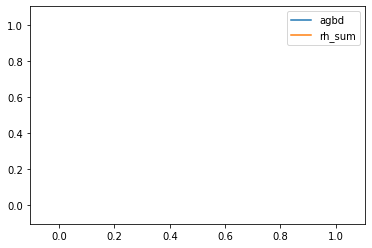

In [3]:
# removing NaN and zero agbd values and rh==0... 
df[(df.agbd != 0) & (df.agbd != -9999) & (df.rh_sum == 0)].plot()

The plot above is empty - there are no rows that has rh_sum == 0 and agbd !=0. 